# Jorge Mariles Estrada A01335663

<a href="https://colab.research.google.com/github/tec03/ParaAssignment01-/blob/main/assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [28]:
data=pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv').dropna()

### pca solo en componentes numericas continuas

In [29]:
data.head(5)

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [33]:
variables_num_cont=['X1']
variables_num_cont.extend([f'X{ind}' for ind in range (12,24)])
numericas=data[variables_num_cont]
numericas.head()

,X1,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


### standar scaler

In [34]:
scaler=StandardScaler()
scaler.fit(numericas)
data_scaled=scaler.transform(numericas)
data_scaled

array([[-1.13736269, -0.64249667, -0.64735943, ..., -0.30810735,
        -0.31412418, -0.29348473],
       [-0.36656147, -0.65920548, -0.66669659, ..., -0.24431534,
        -0.31412418, -0.18105373],
       [-0.59780183, -0.29873773, -0.49394006, ..., -0.24431534,
        -0.24870184, -0.01240721],
       ...,
       [-1.06028257, -0.6472202 , -0.64379252, ..., -0.0401809 ,
        -0.18327949, -0.11921667],
       [-0.67488196, -0.71793741,  0.40975268, ..., -0.18524394,
         3.15090487, -0.19207196],
       [-0.90612232, -0.04505161, -0.00414961, ..., -0.24431534,
        -0.24870184, -0.23726923]])

In [35]:
pcs = PCA()
pcs.fit(data_scaled)
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
Standard deviation,2.431833,1.308475,0.970681,0.940219,0.934690,0.884517,0.860660,0.852271,0.514304,0.266470,0.202649,0.159180,0.152466
Proportion of variance,0.454893,0.131696,0.072476,0.067999,0.067201,0.060180,0.056978,0.055872,0.020346,0.005462,0.003159,0.001949,0.001788
Cumulative proportion,0.454893,0.586589,0.659066,0.727064,0.794266,0.854446,0.911424,0.967296,0.987642,0.993104,0.996263,0.998212,1.000000


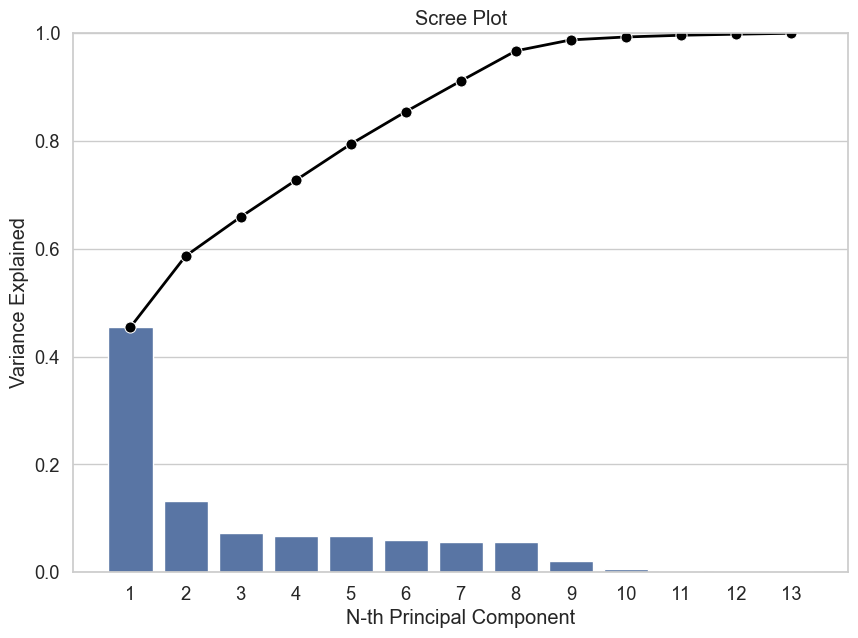

In [40]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()


In [41]:
# 7 0 8 componentes seria una buena reduccion para conservar una gran cantidad de varianza 
((pcsSummary_df.iloc[2][7])*100).round(0)

97.0

In [42]:
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Standard deviation,2.4318,1.3085,0.9707,0.9402,0.9347,0.8845,0.8607,0.8523,0.5143,0.2665,0.2026,0.1592,0.1525
Proportion of variance,0.4549,0.1317,0.0725,0.0680,0.0672,0.0602,0.0570,0.0559,0.0203,0.0055,0.0032,0.0019,0.0018
Cumulative proportion,0.4549,0.5866,0.6591,0.7271,0.7943,0.8544,0.9114,0.9673,0.9876,0.9931,0.9963,0.9982,1.0000


In [48]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = numericas.columns
                                )
pcsComponents_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
X1,0.164821,0.293951,-0.392929,0.051168,-0.104442,0.255897,-0.800314,0.106114,-0.031168,-0.006176,0.015486,-0.000396,0.003506
X12,0.372685,-0.190703,-0.074363,0.040767,-0.038684,0.003202,0.017836,0.006718,0.566665,0.416023,-0.432994,-0.183815,-0.316575
X13,0.383520,-0.174107,0.003749,0.084287,-0.025024,-0.033223,-0.012841,-0.136093,0.386852,0.038427,0.344977,0.329514,0.645248
X14,0.388541,-0.125829,0.072482,0.110977,0.102285,-0.115389,-0.025799,0.096941,0.122913,-0.484780,0.495825,-0.086494,-0.527589
X15,0.391850,-0.119224,0.080828,0.030669,0.011442,0.122134,0.045429,0.033409,-0.205316,-0.523208,-0.489670,-0.362061,0.346080
X16,0.388805,-0.104580,0.050685,-0.102067,-0.103734,-0.014053,0.034811,0.044220,-0.420003,0.068371,-0.249475,0.718369,-0.226743
X17,0.380968,-0.092774,-0.044910,-0.172261,0.069223,-0.005083,0.065330,-0.011980,-0.488817,0.513309,0.338713,-0.427727,0.072324
X18,0.135142,0.386065,0.394230,0.235987,0.033602,-0.179313,-0.167904,-0.735310,-0.056556,0.047513,-0.069349,-0.044847,-0.084572
X19,0.116787,0.411567,0.410514,0.142616,0.399039,-0.250852,-0.074504,0.595197,0.050891,0.147307,-0.068860,0.038933,0.124885
X20,0.128043,0.394763,0.265181,-0.224107,-0.134503,0.752154,0.285234,0.029155,0.144975,0.000138,0.124675,0.025425,-0.063084


## Transformacion de los datos con 8 componentes

In [68]:
pca_final = PCA(n_components=8)
pca_final.fit(data_scaled)
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pca_final.explained_variance_),
                             'Proportion of variance': pca_final.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pca_final.explained_variance_ratio_)
                             })
pcsSummary_df.transpose()

,0,1,2,3,4,5,6,7
Standard deviation,2.431833,1.308475,0.970681,0.940219,0.934690,0.884517,0.860660,0.852271
Proportion of variance,0.454893,0.131696,0.072476,0.067999,0.067201,0.060180,0.056978,0.055872
Cumulative proportion,0.454893,0.586589,0.659066,0.727064,0.794266,0.854446,0.911424,0.967296


In [76]:
pca_transoformed=pca_final.transform(data_scaled)
df_pca=pd.DataFrame(pca_transoformed,columns=[f'PC{x}' for x in range(0,pca_transoformed.shape[1])])
df_pca.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-1.918090,-0.447505,0.372799,-0.039157,0.101868,-0.185385,0.599939,-0.023427
1,-1.702509,-0.148081,0.052725,0.013974,-0.049351,0.014906,0.055071,0.093538
2,-1.219606,-0.274838,0.089727,0.117817,-0.035339,-0.085714,0.336877,0.025400
3,-0.546564,-0.676178,0.356170,0.008157,0.108505,-0.207613,0.507753,-0.040130
4,-0.925751,0.578243,1.112155,-0.230508,0.394817,-0.422728,0.534763,0.953799


## outliners 

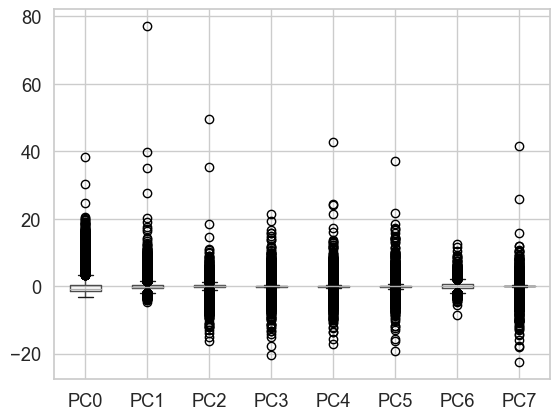

In [77]:
boxplot = df_pca.boxplot()  

# Preguntas
<ol start="1">
  <li>¿Cuál es el número de componentes mínimo y por qué?</li>
  <ul>A mi consideracion, 8 ya que con esas ocho conservamos el 96% de la varianza  </ul>
 <li>¿Cuál es la variación de los datos que representan esos componentes?</li>
  <ul>0.967296 acumulativa </ul>
   <li>¿Cuál es la pérdida de información después de realizar PCA?</li>
  <ul>~.34% </ul>
     <li>De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?</li>
  <ul>X12-X17 contribuyen de gran manera a la primera componente y en la segunda componente las variables de X18 a X23 contribuyen de manera significativa </ul>
       <li>¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?</li>
  <ul>Cuando se tiene una gran cantidad de variables continuas, el beneficio es que el modelo entrenara con menos columnas ayudando al resutlado final </ul>
</ol>